In [1]:
import pandas as pd                     
import matplotlib.pyplot as plt      
import numpy as np        
import pandas
import matplotlib as plt
import matplotlib.pyplot as plt
from os import listdir
from os.path import isfile, join
import csv
import matplotlib as mpl
mpl.style.use('seaborn-darkgrid')

In [2]:
#import and read files
path1="../resources/raw/vehicle_raw/avf_hev_model_offer.csv"
path2="../resources/raw/vehicle_raw/cc_vehicle_hist.csv"
path3="../resources/raw/vehicle_raw/hev_sale.csv"
path4="../resources/raw/vehicle_raw/pev_sales.csv"

avf_hev_model=pd.read_csv(path1)
cc_vehicle=pd.read_csv(path2)
hev_sale=pd.read_csv(path3)
pev_sale=pd.read_csv(path4)

#pd.read_excel("Excelfile.xlsx", dtype=str)

In [3]:
patha="../resources/raw/vehicle_raw/10304_afv_models_oem_2-28-20.xlsx"
pathb="../resources/raw/vehicle_raw/10581_cc_vehicle_history_1-17-20.xlsx"
pathc="../resources/raw/vehicle_raw/10301_hev_sale_2-28-20.xlsx"
pathd="../resources/raw/vehicle_raw/10567_pev_sales_2-28-20.xlsx"


avf_hev_model=pd.read_excel(patha,dtype=str)
cc_vehicle=pd.read_excel(pathb,dtype=str)
hev_sale=pd.read_excel(pathc,dtype=str)
pev_sale=pd.read_excel(pathd,dtype=str)

In [4]:
pev_sale=pev_sale.drop(pev_sale.index[57:67])
pev_sale

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12
0,NaN,U.S. PEV Sales by Model (In Order of Market In...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,Vehicle,Type,2011,2012,2013,2014,2015,2016,2017,2018,2019,Total
2,NaN,Chevy Volt,PHEV,7671,23461,23094,18805,15393,24739,20349,18306,4915,156733
3,NaN,Nissan Leaf,EV,9674,9819,22610,30200,17269,14006,11230,14715,12365,141888
4,NaN,Smart ED,EV,342,139,923,2594,1387,657,544,1219,680,8485
5,NaN,Mitsubishi I EV,EV,76,588,1029,196,115,94,6,0,0,2104
6,NaN,BMW Active E,EV,0,673,0,0,0,0,0,0,0,673
7,NaN,Prius PHEV,PHEV,0,12749,12088,13264,4191,2474,20936,27595,23630,116927
8,NaN,Ford Focus EV,EV,0,683,1738,1964,1582,901,1817,560,0,9245
9,NaN,Honda Fit EV,EV,0,93,569,407,2,0,0,0,0,1071


In [5]:
pev_sale=pev_sale.drop(pev_sale.index[0])

In [6]:
pev_sale
new_header = pev_sale.iloc[0] #grab the first row for the header
pev_sale = pev_sale[1:] #take the data less the header row
pev_sale.columns = new_header #set the header row as


In [7]:
pev_sale.head()

1,NaN,Vehicle,Type,2011,2012,2013,2014,2015,2016,2017,2018,2019,Total
2,NaN,Chevy Volt,PHEV,7671,23461,23094,18805,15393,24739,20349,18306,4915,156733
3,NaN,Nissan Leaf,EV,9674,9819,22610,30200,17269,14006,11230,14715,12365,141888
4,NaN,Smart ED,EV,342,139,923,2594,1387,657,544,1219,680,8485
5,NaN,Mitsubishi I EV,EV,76,588,1029,196,115,94,6,0,0,2104
6,NaN,BMW Active E,EV,0,673,0,0,0,0,0,0,0,673


In [8]:
pev_sale=pev_sale.drop(columns=['Vehicle', 'Total'])

In [9]:
pev_sale_clean=pev_sale[['Type','2011','2012','2013',
          '2014','2015','2016','2017',
          '2018','2019']]
pev_sale_clean=pev_sale_clean.drop(pev_sale_clean.index[55])

In [10]:
#55 different makes 
vehicle_make_count=len(pev_sale_clean)
vehicle_make_count
pev_sale_clean.head()

1,Type,2011,2012,2013,2014,2015,2016,2017,2018,2019
2,PHEV,7671,23461,23094,18805,15393,24739,20349,18306,4915
3,EV,9674,9819,22610,30200,17269,14006,11230,14715,12365
4,EV,342,139,923,2594,1387,657,544,1219,680
5,EV,76,588,1029,196,115,94,6,0,0
6,EV,0,673,0,0,0,0,0,0,0


In [11]:
#pev_sale_grouped=pev_sale_clean.groupby(pev_sale_clean['Type']).sum()
pev_sale_clean[['2011','2012','2013',
          '2014','2015','2016','2017',
          '2018','2019']]=pev_sale_clean[['2011','2012','2013',
                                          '2014','2015','2016','2017','2018','2019']].astype('int') 

In [12]:
pev_sale_clean.head()

1,Type,2011,2012,2013,2014,2015,2016,2017,2018,2019
2,PHEV,7671,23461,23094,18805,15393,24739,20349,18306,4915
3,EV,9674,9819,22610,30200,17269,14006,11230,14715,12365
4,EV,342,139,923,2594,1387,657,544,1219,680
5,EV,76,588,1029,196,115,94,6,0,0
6,EV,0,673,0,0,0,0,0,0,0


In [13]:
pev_sale_clean=pev_sale_clean.set_index(pev_sale_clean['Type'])
pev_sale_grouped=pev_sale_clean.groupby([pev_sale_clean.index]).sum()
pev_sale_grouped

1,2011,2012,2013,2014,2015,2016,2017,2018,2019
Type,,,,,,,,,
EV,10092,14587,48094,63525,71064,86731,104492,238823,241912
PHEV,7671,38584,49008,55357,42959,72885,91089,122492,84732


In [14]:
pev_sale_grouped=pev_sale_grouped.transpose()

In [15]:
graph_path=("../Graphs/Kat_graphs/")
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                               AutoMinorLocator)

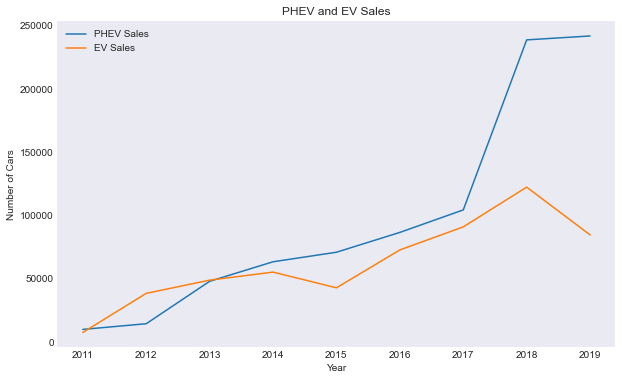

In [16]:
fig, ax = plt.subplots(figsize = (10,6))
ax = plt.plot(pev_sale_grouped)
plt.title('PHEV and EV Sales')
plt.xlabel('Year')
plt.ylabel('Number of Cars')
plt.legend(['PHEV Sales','EV Sales'], loc="best")
plt.grid()
plt.show()
fig.savefig(graph_path + 'EV_PHEV_sales.png')

In [17]:
hev_sale.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23
0,NaN,HEV Sales by Model (In Order of Market Introdu...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,Vehicle,1999,2000,2001,2002,2003,2004,2005,2006,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,Total
2,NaN,Honda Insight,17,3788,4726,2216,1168,583,666,722,...,15549,5846,4802,3965,1458,75,3,12510,23686,123317
3,NaN,Toyota Prius,0,5562,15556,20119,24627,53991,107897,106971,...,136463,223906,222140,194108,180603,134155,87725,59995,47862,2242397
4,NaN,Honda Civic,0,0,0,13707,21771,26013,25864,31253,...,4703,7156,7719,5070,4887,896,65,6,0,235437


In [18]:
hev_sale=hev_sale.drop(hev_sale.index[0])

In [19]:
new_header = hev_sale.iloc[0] #grab the first row for the header
hev_sale = hev_sale[1:] #take the data less the header row
hev_sale.columns = new_header #set the header row as


In [20]:
hev_sale_clean=hev_sale[['1999','2000','2001','2002','2003','2004','2005','2006','2007','2008',
                         '2009','2010','2011','2012','2013','2014','2015',
                         '2016','2017','2018','2019']]
hev_sale_clean

1,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
2,17,3788,4726,2216,1168,583,666,722,3,0,...,20962,15549,5846,4802,3965,1458,75,3,12510,23686
3,0,5562,15556,20119,24627,53991,107897,106971,181221,158886,...,140928,136463,223906,222140,194108,180603,134155,87725,59995,47862
4,0,0,0,13707,21771,26013,25864,31253,32575,31297,...,7336,4703,7156,7719,5070,4887,896,65,6,0
5,0,0,0,0,0,2993,15960,22549,25108,19522,...,12088,10089,1441,0,0,0,0,0,0,0
6,0,0,0,0,0,653,16826,5598,3405,198,...,0,0,0,996,13977,11065,9179,22008,17188,23817
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
68,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
69,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
70,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [21]:
hev_sale_clean=hev_sale_clean.drop(hev_sale_clean.index[62:71])
hev_sale_clean

1,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
2,17,3788,4726,2216,1168,583,666,722,3,0,...,20962,15549,5846,4802,3965,1458,75,3,12510,23686
3,0,5562,15556,20119,24627,53991,107897,106971,181221,158886,...,140928,136463,223906,222140,194108,180603,134155,87725,59995,47862
4,0,0,0,13707,21771,26013,25864,31253,32575,31297,...,7336,4703,7156,7719,5070,4887,896,65,6,0
5,0,0,0,0,0,2993,15960,22549,25108,19522,...,12088,10089,1441,0,0,0,0,0,0,0
6,0,0,0,0,0,653,16826,5598,3405,198,...,0,0,0,996,13977,11065,9179,22008,17188,23817
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,123,0
60,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,8603
61,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,16299
62,17,9350,20282,36042,47566,84233,205876,251864,351071,315763,...,274648,266501,434648,495535,452172,384400,346949,362868,343219,400746


In [22]:
hev_sale_clean=hev_sale_clean.drop(hev_sale_clean.index[61:64])

In [23]:
hev_sale_clean=hev_sale_clean.drop(hev_sale_clean.index[60])

In [24]:
hev_sale_clean=hev_sale_clean.astype('int') 
hev_sale_clean.head()

1,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
2,17,3788,4726,2216,1168,583,666,722,3,0,...,20962,15549,5846,4802,3965,1458,75,3,12510,23686
3,0,5562,15556,20119,24627,53991,107897,106971,181221,158886,...,140928,136463,223906,222140,194108,180603,134155,87725,59995,47862
4,0,0,0,13707,21771,26013,25864,31253,32575,31297,...,7336,4703,7156,7719,5070,4887,896,65,6,0
5,0,0,0,0,0,2993,15960,22549,25108,19522,...,12088,10089,1441,0,0,0,0,0,0,0
6,0,0,0,0,0,653,16826,5598,3405,198,...,0,0,0,996,13977,11065,9179,22008,17188,23817


In [25]:
type(hev_sale_clean)

pandas.core.frame.DataFrame

In [81]:
hev_sales_num=hev_sale_clean.sum(axis=0)


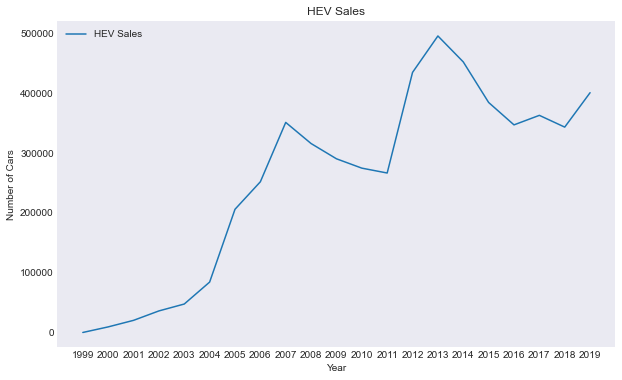

In [27]:
fig, ax = plt.subplots(figsize = (10,6))
ax = plt.plot(hev_sales_num)
plt.title('HEV Sales')
plt.xlabel('Year')
plt.ylabel('Number of Cars')
plt.legend(['HEV Sales'], loc="upper left")
plt.grid()
plt.show()
fig.savefig(graph_path + 'HEV_sales.png')

In [80]:
cc_vehicle=pd.read_excel(pathb,dtype=str)


In [78]:
new_header = cc_vehicle.iloc[1] #grab the first row for the header
cc_vehicle = cc_vehicle[2:] #take the data less the header row
cc_vehicle.columns = new_header #set the header row as


In [30]:
cc_vehicle=cc_vehicle.drop(cc_vehicle.index[12:25])

In [31]:
cc_vehicle=cc_vehicle.drop(cc_vehicle.index[10])

In [79]:
cc_vehicle_cl=cc_vehicle.drop(cc_vehicle.index[10])


IndexError: index 10 is out of bounds for axis 0 with size 9

In [33]:
cc_vehicle_1=cc_vehicle_cl.dropna(axis='columns')

In [34]:
cc_vehicle_1

1,NaN,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
2,E85,47643,72899,221834,385671,524169,642520,403981,479706,197187,259337,275508,271996,457817,327865,263967
3,HEVs,10674,18553,43886,81987,101954,107585,30613,50503,141406,83339,82834,94330,129827,178011,178733
4,Biodiesel,31922,52275,91584,98785,17222,2814,88726,99347,103106,98028,130540,189823,160763,150695,153380
5,CNG,76257,49271,57458,55021,51121,44317,42911,48157,59521,79616,68479,107283,98388,97271,82266
6,Propane,31338,21117,25543,23628,22260,7937,13196,18793,16501,35554,17404,22762,23648,34753,25395
7,LNG,0,1873,2271,1731,2053,2038,3410,4315,3411,3645,2992,3974,4924,5070,5100
8,Hydrogen,23,42,72,86,75,74,62,118,50,46,49,95,97,116,402
9,PEVs,9241,7464,9481,5895,14135,4568,9223,10541,20455,32187,65042,96896,171011,162811,227854
10,RNG,0,0,0,0,0,0,0,0,0,0,313,366,1157,1734,1677
11,Renewable diesel,0,0,0,0,0,0,0,0,0,0,0,3183,71066,7819,11174


In [35]:
cc_vehicle_1=pd.DataFrame(cc_vehicle_1)

In [36]:
cc_vehicle_1

1,NaN,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
2,E85,47643,72899,221834,385671,524169,642520,403981,479706,197187,259337,275508,271996,457817,327865,263967
3,HEVs,10674,18553,43886,81987,101954,107585,30613,50503,141406,83339,82834,94330,129827,178011,178733
4,Biodiesel,31922,52275,91584,98785,17222,2814,88726,99347,103106,98028,130540,189823,160763,150695,153380
5,CNG,76257,49271,57458,55021,51121,44317,42911,48157,59521,79616,68479,107283,98388,97271,82266
6,Propane,31338,21117,25543,23628,22260,7937,13196,18793,16501,35554,17404,22762,23648,34753,25395
7,LNG,0,1873,2271,1731,2053,2038,3410,4315,3411,3645,2992,3974,4924,5070,5100
8,Hydrogen,23,42,72,86,75,74,62,118,50,46,49,95,97,116,402
9,PEVs,9241,7464,9481,5895,14135,4568,9223,10541,20455,32187,65042,96896,171011,162811,227854
10,RNG,0,0,0,0,0,0,0,0,0,0,313,366,1157,1734,1677
11,Renewable diesel,0,0,0,0,0,0,0,0,0,0,0,3183,71066,7819,11174


In [37]:
cc_vehicle_1[['2004','2005','2006','2007','2008',
                '2009','2010','2011','2012','2013','2014','2015',
                '2016','2017','2018']]= cc_vehicle_1[['2004','2005','2006','2007','2008',
                                                      '2009','2010','2011','2012','2013','2014','2015',
                                                      '2016','2017','2018']].astype('int') 

In [38]:
#cc_vehicle_1=cc_vehicle_1.rename(columns = {list(cc_vehicle_1)[0]: 'Type'}, inplace = True)

In [45]:
cc_vehicle_1=cc_vehicle_1.rename(columns={'':'Type'})

In [50]:
cc_vehicle_2=cc_vehicle_1.rename(columns = {list(cc_vehicle_1)[0]: 'Type'},)

In [39]:
#cc_vehicle_1['type']=cc_vehicle_1['Type'].astype('str')

In [55]:
cc_vehicle_2

1,Type,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
2,E85,47643,72899,221834,385671,524169,642520,403981,479706,197187,259337,275508,271996,457817,327865,263967
3,HEVs,10674,18553,43886,81987,101954,107585,30613,50503,141406,83339,82834,94330,129827,178011,178733
4,Biodiesel,31922,52275,91584,98785,17222,2814,88726,99347,103106,98028,130540,189823,160763,150695,153380
5,CNG,76257,49271,57458,55021,51121,44317,42911,48157,59521,79616,68479,107283,98388,97271,82266
6,Propane,31338,21117,25543,23628,22260,7937,13196,18793,16501,35554,17404,22762,23648,34753,25395
7,LNG,0,1873,2271,1731,2053,2038,3410,4315,3411,3645,2992,3974,4924,5070,5100
8,Hydrogen,23,42,72,86,75,74,62,118,50,46,49,95,97,116,402
9,PEVs,9241,7464,9481,5895,14135,4568,9223,10541,20455,32187,65042,96896,171011,162811,227854
10,RNG,0,0,0,0,0,0,0,0,0,0,313,366,1157,1734,1677
11,Renewable diesel,0,0,0,0,0,0,0,0,0,0,0,3183,71066,7819,11174


In [65]:
vehic=cc_vehicle_2.set_index('Type')
vehic

1,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
Type,,,,,,,,,,,,,,,
E85,47643,72899,221834,385671,524169,642520,403981,479706,197187,259337,275508,271996,457817,327865,263967
HEVs,10674,18553,43886,81987,101954,107585,30613,50503,141406,83339,82834,94330,129827,178011,178733
Biodiesel,31922,52275,91584,98785,17222,2814,88726,99347,103106,98028,130540,189823,160763,150695,153380
CNG,76257,49271,57458,55021,51121,44317,42911,48157,59521,79616,68479,107283,98388,97271,82266
Propane,31338,21117,25543,23628,22260,7937,13196,18793,16501,35554,17404,22762,23648,34753,25395
LNG,0,1873,2271,1731,2053,2038,3410,4315,3411,3645,2992,3974,4924,5070,5100
Hydrogen,23,42,72,86,75,74,62,118,50,46,49,95,97,116,402
PEVs,9241,7464,9481,5895,14135,4568,9223,10541,20455,32187,65042,96896,171011,162811,227854
RNG,0,0,0,0,0,0,0,0,0,0,313,366,1157,1734,1677


In [73]:
vehic_trans=vehic.transpose()

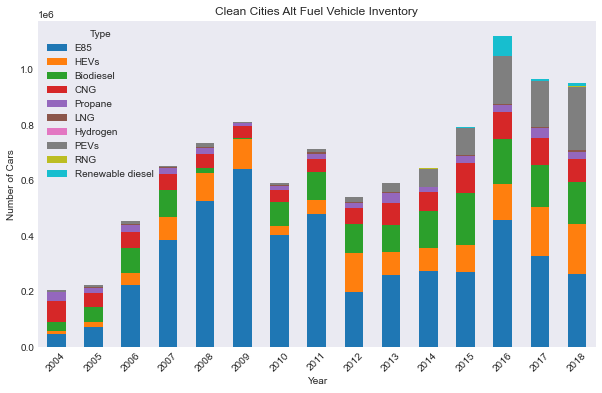

In [83]:

vehic_trans.plot(kind='bar',stacked=True, figsize = (10,6), rot=45)
plt.title('Clean Cities Alt Fuel Vehicle Inventory')
plt.xlabel('Year')
plt.ylabel('Number of Cars')
plt.grid()
plt.savefig(graph_path + 'cc_inventory.png')